<a href="https://colab.research.google.com/github/lucasmanesco/analise_dados_empresa_vendas/blob/main/An%C3%A1lise_de_Dados_da_Empresa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados da Empresa

Análise de dados de uma planilha de vendas de uma empresa.

In [ ]:
# instalar pacotes necessários
!pip install pywaffle -q

In [52]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from pywaffle import Waffle

In [4]:
# montar o drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# importar a planilha com pandas
planilha = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projetos/controle_da_empresa.xlsx', None)

# selecionar aba 'Vendas'
df = planilha['Vendas']

# visualizar as 5 primeiras entradas
df.head()

,Data da Venda,Item,Quantidade,Vendedor,Preço Unitário,Total de Vendas
0,2020-01-02,Lente 50mm f/1.4,2,Carlos,1649,3298
1,2020-01-02,Filtro ND 5 Stop,2,Raquel,1220,2440
2,2020-01-03,Filtro ND 5 Stop,2,Raquel,1220,2440
3,2020-01-03,Lente 16-35mm f/2.8,2,Carlos,8997,17994
4,2020-01-04,Lente 16-35mm f/2.8,2,Fernanda,8997,17994


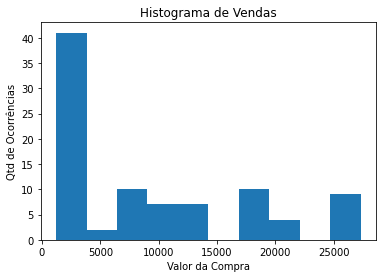

In [10]:
# plotar um histograma do total de vendas
plt.hist('Total de Vendas', data=df)

# titulo e labels
plt.title('Histograma de Vendas')
plt.xlabel('Valor da Compra')
plt.ylabel('Qtd de Ocorrências')

# exibir plot
plt.show()

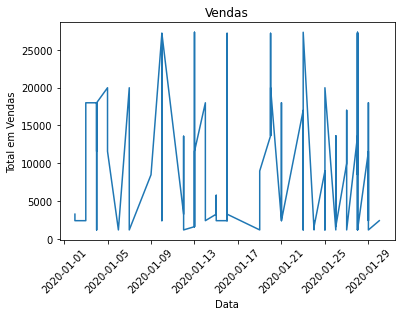

In [19]:
# plotar um gráfico de linha das vendas ao longo do tempo
plt.plot('Data da Venda', 'Total de Vendas', data=df)

# transformar a coluna Datas para o formato datetime
df['Data da Venda'] = pd.to_datetime(df['Data da Venda'], infer_datetime_format=True)

# titulo e labels
plt.title("Vendas")
plt.ylabel("Total em Vendas")
plt.xlabel("Data")
plt.xticks(rotation=45)

# exibir plot
plt.show()

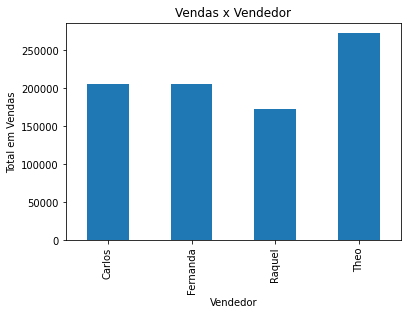

In [27]:
# agrupando total de vendas por vendedor
df.groupby('Vendedor')['Total de Vendas'].sum()

# plotar um gráfico de barras para os vendedores
df.groupby('Vendedor')['Total de Vendas'].sum().plot.bar()

# titulo e labels
plt.title("Vendas x Vendedor")
plt.ylabel("Total em Vendas")
plt.xlabel("Vendedor")

# exibir plot
plt.show()

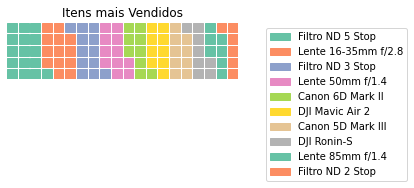

In [69]:
# criar um dicionario de itens vendidos
a = dict(df.Item.value_counts())

# plotar um gráfico waffle para os produtos mais vendidos
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=20,
                values=a,
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.1, 1)}
                )

# titulo
plt.title("Itens mais Vendidos")

# exibir plot
plt.show()